In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'gender': np.random.choice(['Male', 'Female'], n),
    'SeniorCitizen': np.random.choice([0, 1], n),
    'Partner': np.random.choice(['Yes', 'No'], n),
    'Dependents': np.random.choice(['Yes', 'No'], n),
    'tenure': np.random.randint(0, 72, n),
    'PhoneService': np.random.choice(['Yes', 'No'], n),
    'MonthlyCharges': np.round(np.random.uniform(20, 120, n), 2),
    'TotalCharges': lambda d: np.round(d['tenure'] * d['MonthlyCharges'], 2),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n),
    'Churn': np.random.choice(['Yes', 'No'], n)
})
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']

df = df.dropna()
le = LabelEncoder()
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'Contract', 'Churn']:
    df[col] = le.fit_transform(df[col])

X = df.drop('Churn', axis=1)
y = df['Churn']

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.52      0.47      0.49       105
           1       0.47      0.52      0.49        95

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62       105
           1       0.58      0.59      0.59        95

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.61      0.60      0.61       200



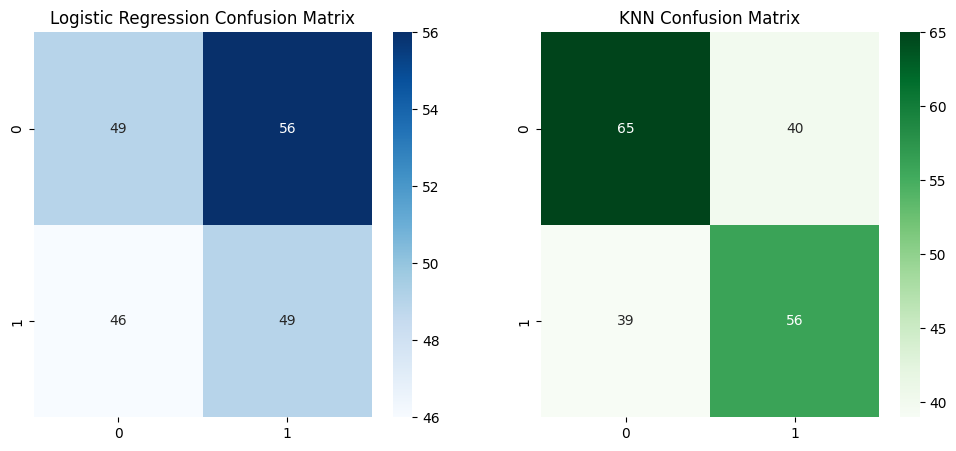

In [4]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.subplot(1, 2, 2)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.show()


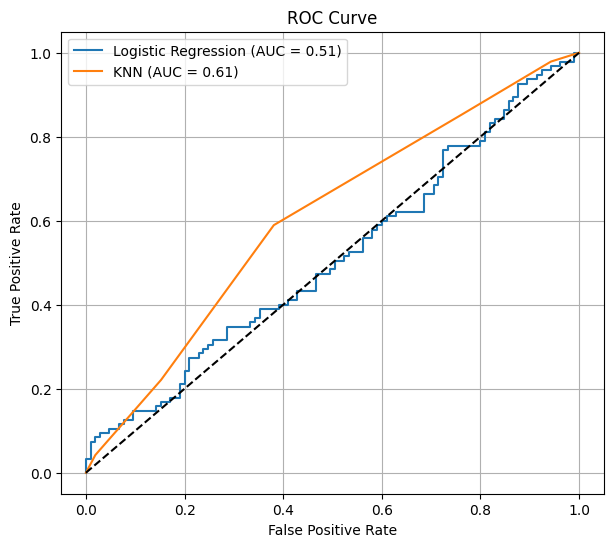

In [5]:
y_score_lr = lr.predict_proba(X_test)[:, 1]
y_score_knn = knn.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(7, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
